## Tarea 4 - Ejercicio 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


DataWeekly=pd.read_csv('Weekly.csv') 
print(DataWeekly[0:10])
print(DataWeekly.shape)
columns = DataWeekly.columns
print(columns)

DataWeekly_subset=DataWeekly[columns[1:8]]
print(DataWeekly_subset[0:10])
print(DataWeekly_subset.shape)


   Unnamed: 0  Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  \
0           1  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270   
1           2  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576   
2           3  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514   
3           4  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712   
4           5  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178   
5           6  1990  1.178  0.712  3.514 -2.576 -0.270  0.154444 -1.372   
6           7  1990 -1.372  1.178  0.712  3.514 -2.576  0.151722  0.807   
7           8  1990  0.807 -1.372  1.178  0.712  3.514  0.132310  0.041   
8           9  1990  0.041  0.807 -1.372  1.178  0.712  0.143972  1.253   
9          10  1990  1.253  0.041  0.807 -1.372  1.178  0.133635 -2.678   

  Direction  
0      Down  
1      Down  
2        Up  
3        Up  
4        Up  
5      Down  
6        Up  
7        Up  
8        Up  
9      Down  
(1089, 10)
Index(['U

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000


Text(0, 0.5, 'Shares (billions)')

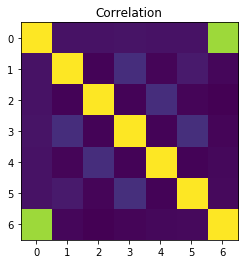

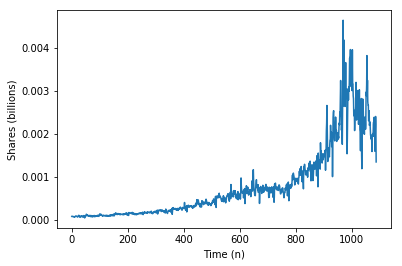

In [96]:
# Part a

Correlation = DataWeekly_subset.corr()

print(Correlation)
plt.figure()
plt.imshow(Correlation)
plt.title('Correlation')

volume = DataWeekly_subset['Volume'] / DataWeekly['Year']

plt.figure()
plt.plot(volume)
plt.xlabel('Time (n)')
plt.ylabel('Shares (billions)')

La relación entre volumen y tiempo (años) muestra que hay una tendencia de subida en la relación, se parece a una subida exponencial con picos de subida y bajada hasta aproximadamente las 1000 observaciones y luego esta tendencia vuelve a bajar al parecer exponencialmente.

In [266]:
# Data preparation
DataWeekly_array= DataWeekly[columns[2:8]].to_numpy('float32')
Train = DataWeekly_array

y_label = np.zeros((DataWeekly['Direction'].shape[0],1))
y_label[DataWeekly['Direction'] == 'Up'] = 1
y_label[DataWeekly['Direction'] == 'Down'] =-1

N = Train.shape[0];
# agrega una columna de unos
Xtrain = np.c_[np.ones((N,1)), Train];

In [273]:
def LogisticRegression(Xtrain,y_label):
    N = Xtrain.shape[0];
    learning_rate = 0.1;
    maximum_iterations = 200;
    w = np.zeros((Xtrain.shape[1],1));
    print('w:', w.shape, w.T.shape)
    #Ein = np.zeros((maximum_iterations,1))
    Ein = []
    
    iterations = 0
    while iterations < maximum_iterations:
        # calculando el gradiente para ctualizar
        suma = np.zeros((w.shape[1]))
        for n in range(N):
            suma = suma + paso_gradiente(Xtrain, y_label, w, n)
        gradiente = -suma/N

        # actualizando w
        w = w - learning_rate * gradiente.reshape(w.shape)
        iterations += 1

        Ein.append(inSampleError(Xtrain, y_label, w, N))

    return w,Ein

# Sigmoid function
def sigmoid(x):
    s = 1.0 / (1.0+np.exp(-x))
    return s

def paso_gradiente(x,y,w, n):
    # numerador = y[n] * x[n] # nota x_n se considera vector columna (recomendacion)
    # nota x_n se considera vector columna (recomendacion)
    numerador = y[n] * x[n].reshape(1,-1)
    # el denominador debe ser un escalar
    # para que sea un escalar x[n] debe ser de dimension (7,1) (vector columna)
    denominador = 1 + np.exp(np.dot(y[n], w.T) @ x[n].reshape(-1, 1))
    matriz = numerador/denominador
    return matriz

def inSampleError(x, y, w, N):
    suma = 0
    for n in range(N):
        suma += np.log(1 + np.exp(np.dot(-y[n], w.T) @ x[n].reshape(-1, 1)))[0]
    return (suma/N)

w: (7, 1) (1, 7)
Weights: [[ 0.24148684]
 [-0.04034503]
 [ 0.05944294]
 [-0.01522711]
 [-0.02689926]
 [-0.01366847]
 [-0.01447556]]


Text(0, 0.5, 'Error')

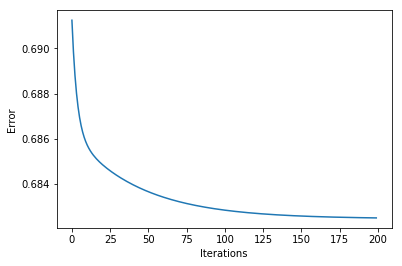

In [324]:
## Part b
w,Ein=LogisticRegression(Xtrain,y_label)
print('Weights:', w)

plt.figure()
plt.plot(Ein)
plt.xlabel('Iterations')
plt.ylabel('Error')


La variable `Lag2` es la que tiene mayor probabilidad con 0.059 seguida de todos los demas predictores como negativos, estas probabilidades son pequeñas.

In [325]:
## Part c
first_10 = Xtrain[0:10,:];

output_probability = sigmoid(w.T @ first_10.T)

print('Probability of first 10 data points', output_probability)

Probability of first 10 data points [[0.60192227 0.59479008 0.58081999 0.47624899 0.61176865 0.56304344
  0.57310039 0.51008279 0.56591202 0.54982244]]


In [370]:
## Part d
output_probability = sigmoid(w.T @ Xtrain.T)
print(output_probability.shape, output_probability[:,0])
corrects = 0
for i in range(output_probability.shape[1]):
    prediction = -1
    if output_probability[:, i] > 0.5:
        prediction = 1
    #if prediction == DataWeekly.iloc[i]['Direction']:
    if prediction == y_label[i]:
        corrects += 1
fraction_correct = corrects/N

print('Fraction of correct predictions:', fraction_correct)

(1, 1089) [0.60192227]
Fraction of correct predictions: 0.5629017447199265


w: (2, 1) (1, 2)
Weights2: [[0.20187443]
 [0.05813084]]


Text(0, 0.5, 'Error')

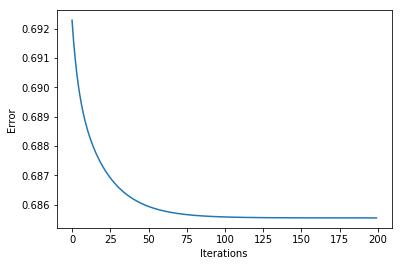

In [347]:
## Part e

## Preparing the dataset
Years = DataWeekly['Year'].to_numpy('int32')
Lag2 = DataWeekly['Lag2'].to_numpy('float32')
train2=Lag2[Years<=2008]
y_label2=y_label[Years<=2008]
test=Lag2[Years>2008]
y_test=y_label[Years>2008]


N2 = train2.shape[0];
Xtrain2 = np.c_[np.ones((N2,1)), train2];

w2, Ein=LogisticRegression(Xtrain2,y_label2)
print('Weights2:', w2)


plt.figure()
plt.plot(Ein)
plt.xlabel('Iterations')
plt.ylabel('Error')

In [374]:
## Testing the model
N3 = test.shape[0];
Xtest = np.c_[np.ones((N3,1)), test];

output_probability2 = sigmoid(w2.T @ Xtest.T)
print('output_probability2:', output_probability2.shape)
corrects = 0
for i in range(output_probability2.shape[1]):
    prediction = -1
    if output_probability2[:, i] > 0.5:
        prediction = 1
    if prediction == y_test[i]:
        corrects += 1
fraction_correct = corrects/N3

print('Fraction of correct predictions in the testing set:', fraction_correct)

output_probability2: (1, 104)
Fraction of correct predictions in the testing set: 0.625
